In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
file_path = '/content/drive/MyDrive/733/final_data.csv'
data = pd.read_csv(file_path)

In [3]:

# Columns of interest
selected_columns = [
    'TOTSQFT', 'TOTHSQFT', 'TYPEHUQ', 'WALLTYPE', 'YEARMADE',
    'URBRUR', 'UGASHERE', 'HBUSNESS', 'OTHWORK', 'ATHOME',
    'EMPLOYHH', 'NHSLDMEM', 'MONEYPY', 'LRGSTATE', 'HD65',
    'CD65'
]

# Function to plot average KWH for each unique value in a column
def plot_avg_kwh_by_column(data, column):
    # Grouping the data by the column and calculating the mean KWH
    avg_kwh = data.groupby(column)['KWH'].mean().reset_index()

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column, y='KWH', data=avg_kwh)
    plt.title(f'Average KWH by {column}')
    plt.ylabel('Average KWH')
    plt.xticks(rotation=45)
    plt.show()


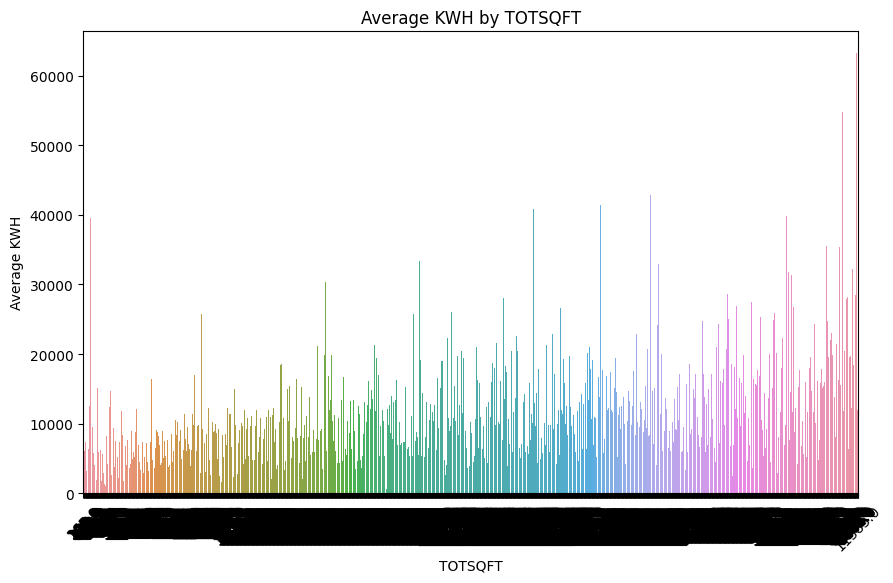

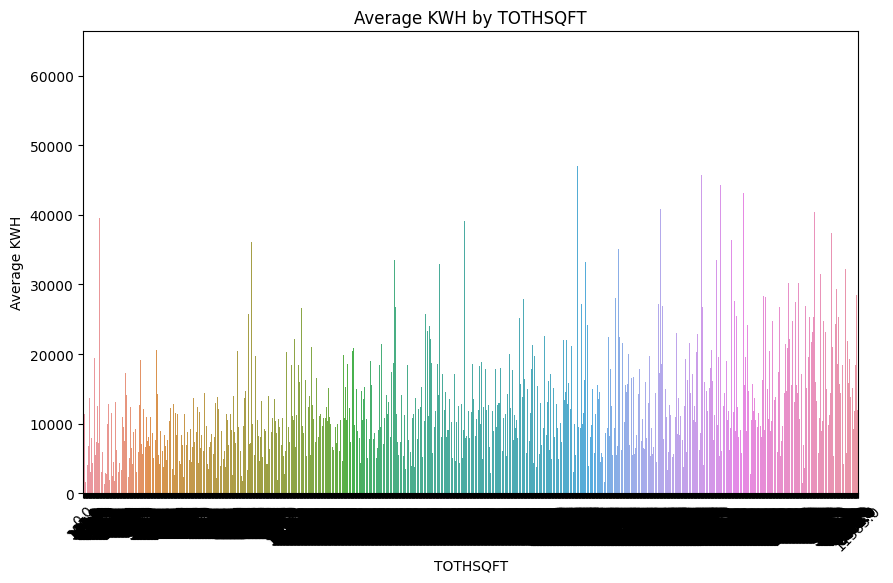

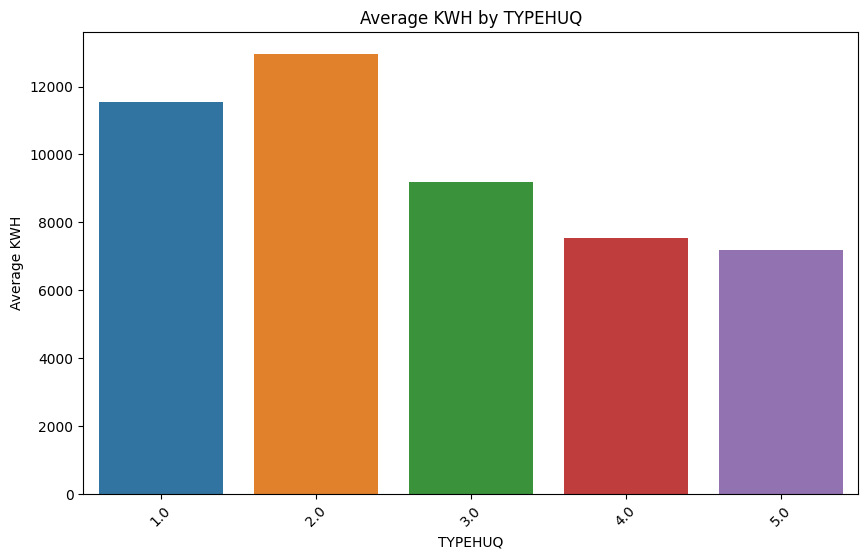

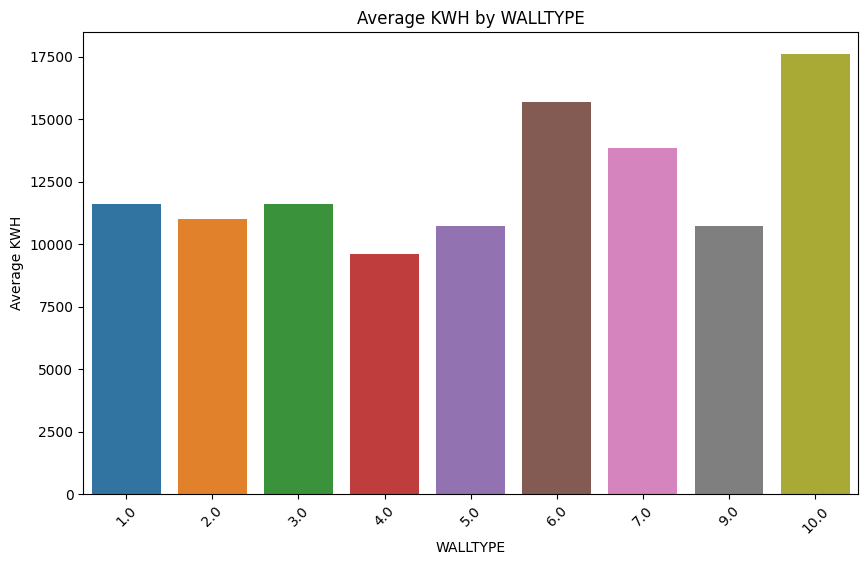

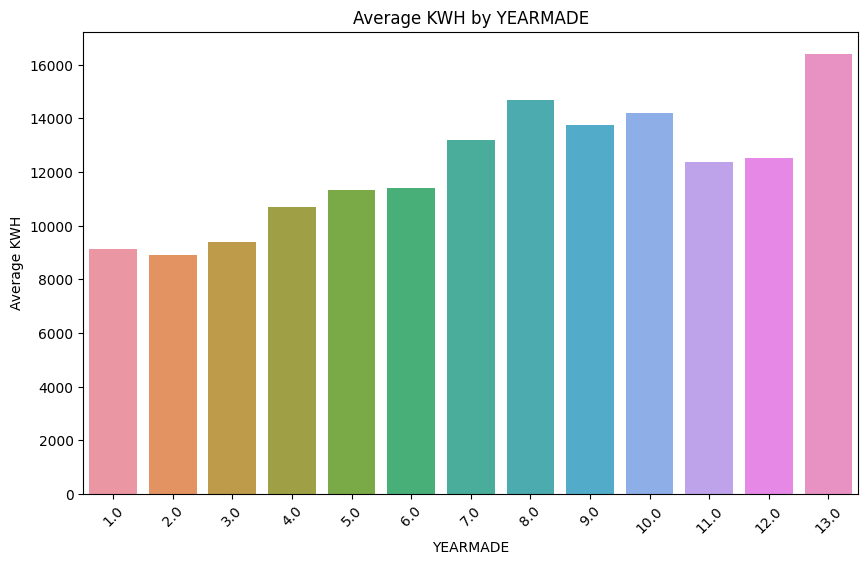

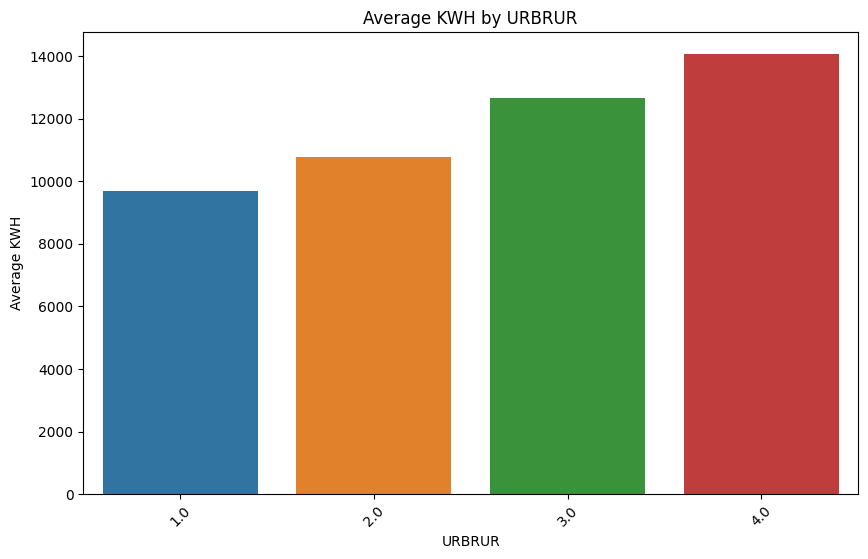

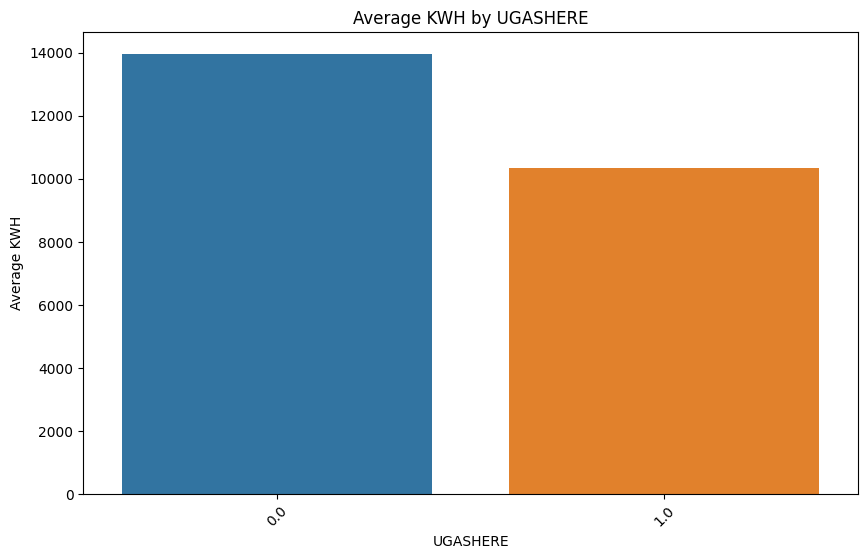

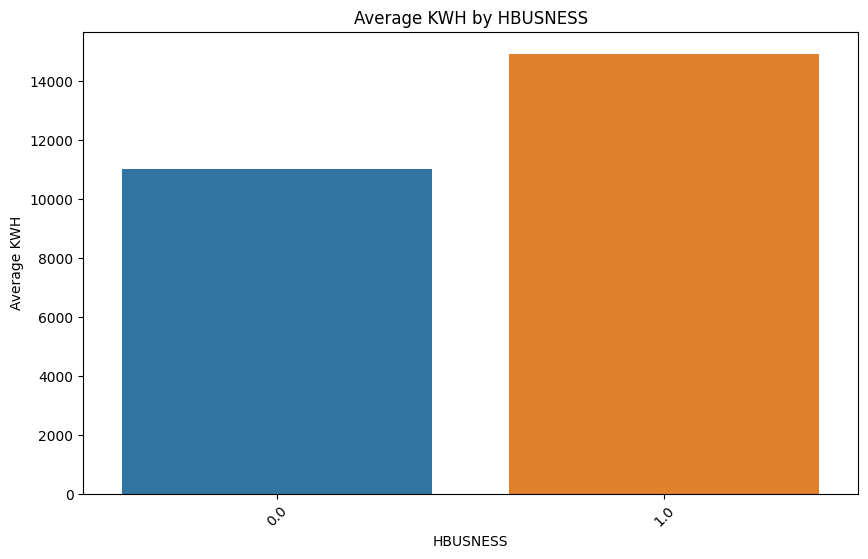

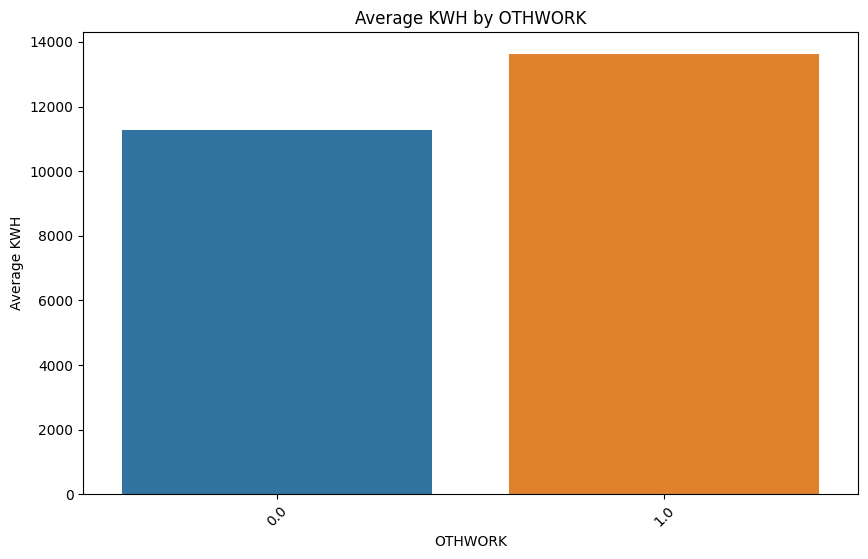

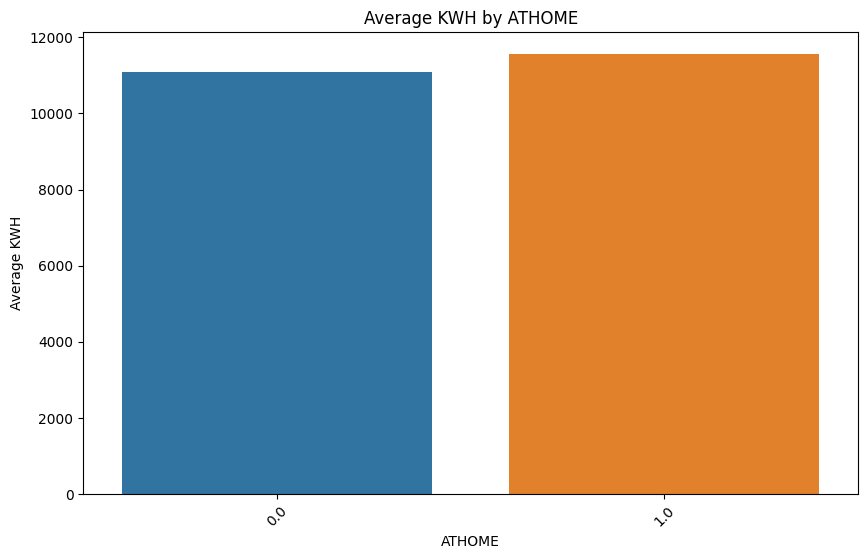

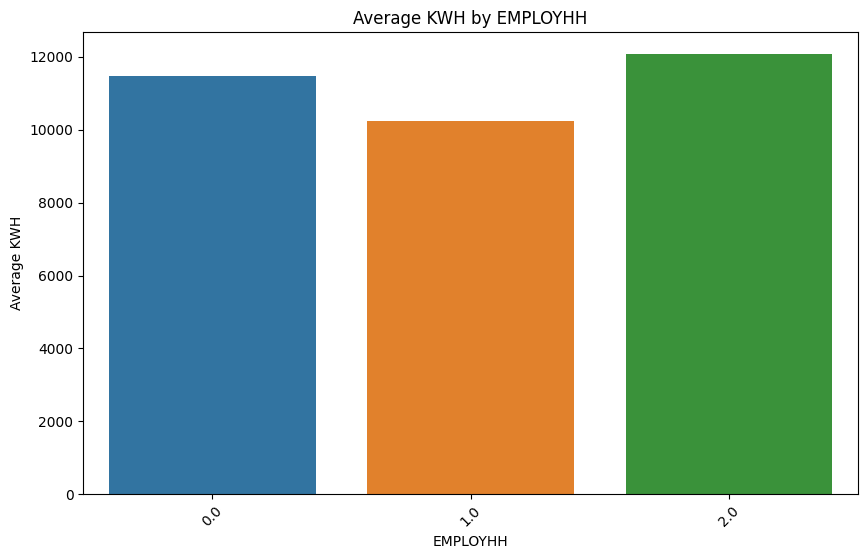

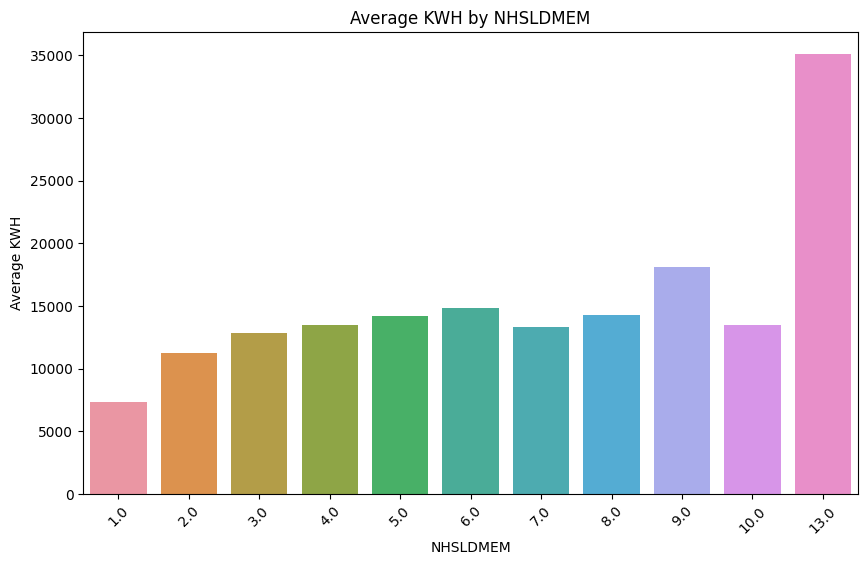

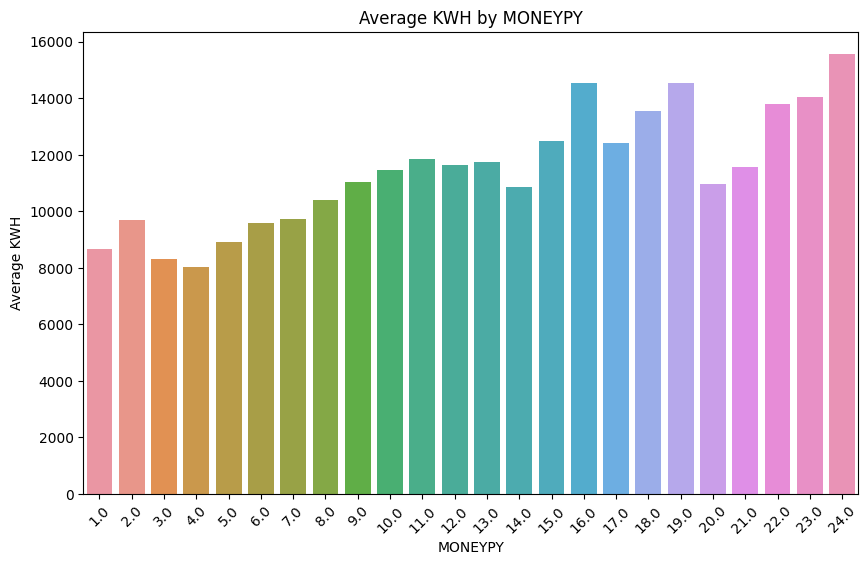

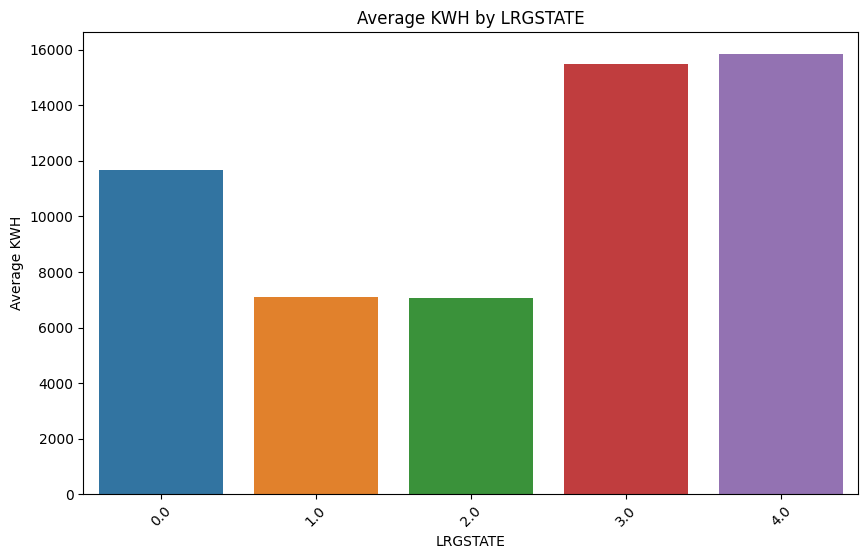

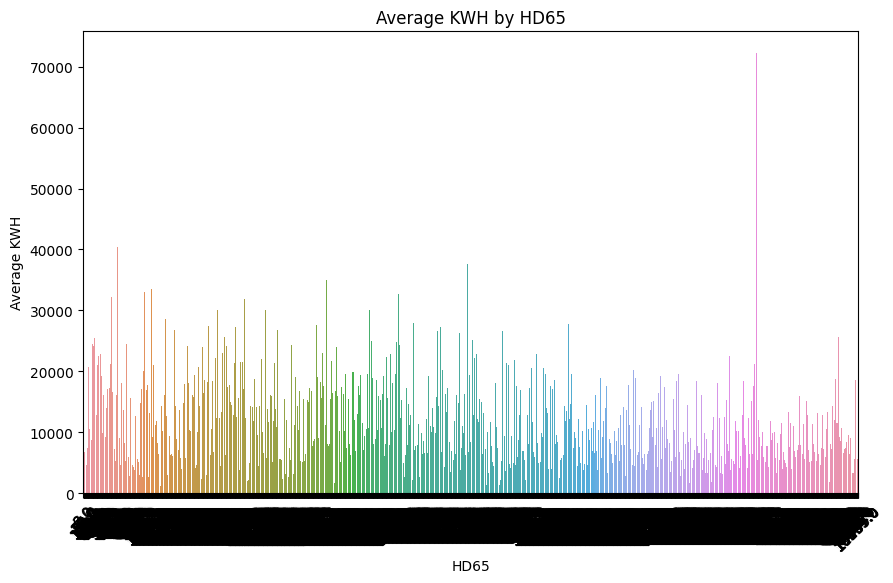

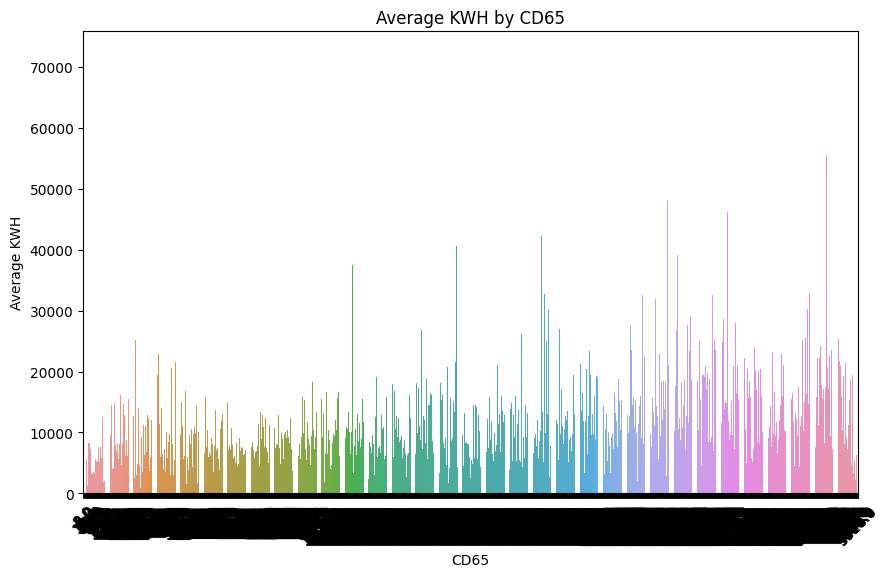

In [4]:

# Plotting for each column
for column in selected_columns:
    plot_avg_kwh_by_column(data, column)


In [5]:

# Check for missing values
print(data.isnull().sum())

# Split the data into features and target
X = data[['TOTSQFT', 'TOTHSQFT', 'TYPEHUQ', 'WALLTYPE', 'YEARMADE', 'URBRUR', 'UGASHERE', 'HBUSNESS', 'OTHWORK', 'ATHOME', 'EMPLOYHH', 'NHSLDMEM', 'MONEYPY', 'LRGSTATE', 'HD65', 'CD65']]
Y = data['KWH']

# Output the first few rows to check
print(X.head())
print(Y.head())


DOEID       0
ALTHUQ      0
WALLTYPE    0
YEARMADE    0
URBRUR      0
           ..
btu_os      0
T_ELEC      0
T_NG        0
T_FO        0
T_LP        0
Length: 95, dtype: int64
   TOTSQFT  TOTHSQFT  TYPEHUQ  WALLTYPE  YEARMADE  URBRUR  UGASHERE  HBUSNESS  \
0   1989.0    1739.0      2.0       1.0       3.0     1.0       1.0       0.0   
1   1320.0     660.0      2.0       3.0       6.0     3.0       1.0       0.0   
2   3075.0    1886.0      2.0       1.0       4.0     1.0       1.0       0.0   
3    899.0     899.0      3.0       3.0       1.0     2.0       0.0       0.0   
4   2176.0    1332.0      2.0       1.0       8.0     3.0       1.0       0.0   

   OTHWORK  ATHOME  EMPLOYHH  NHSLDMEM  MONEYPY  LRGSTATE    HD65    CD65  
0      0.0     1.0       2.0       2.0      8.0       3.0  1231.0  3281.0  
1      0.0     1.0       1.0       4.0     13.0       2.0  1663.0  1123.0  
2      0.0     1.0       1.0       2.0     10.0       0.0  5221.0  1286.0  
3      0.0     0.0       2.0  

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'X' is your features dataframe from the previous step

# Update categorical and numerical columns lists
categorical_columns = ['TYPEHUQ', 'WALLTYPE', 'URBRUR', 'UGASHERE', 'HBUSNESS', 'OTHWORK', 'ATHOME', 'EMPLOYHH', 'MONEYPY', 'LRGSTATE', 'YEARMADE']
numerical_columns = ['TOTSQFT', 'NHSLDMEM', 'HD65', 'CD65']

# Separate the data into categorical and numerical dataframes
X_categorical = X[categorical_columns]
X_numerical = X[numerical_columns]

# Initialize OneHotEncoder and StandardScaler
encoder = OneHotEncoder(drop='first')
scaler = StandardScaler()

# Apply OneHotEncoder to the categorical data
X_categorical_transformed = encoder.fit_transform(X_categorical)
categorical_feature_names = encoder.get_feature_names_out(categorical_columns)
X_categorical_df = pd.DataFrame(X_categorical_transformed.toarray(), columns=categorical_feature_names)

# Apply StandardScaler to the numerical data
X_numerical_transformed = scaler.fit_transform(X_numerical)
X_numerical_df = pd.DataFrame(X_numerical_transformed, columns=numerical_columns)

# Concatenate the transformed categorical and numerical dataframes
X_transformed_df = pd.concat([X_categorical_df, X_numerical_df], axis=1)

# Check the first few rows of the transformed dataframe
X_transformed_df


,TYPEHUQ_2.0,TYPEHUQ_3.0,TYPEHUQ_4.0,TYPEHUQ_5.0,WALLTYPE_2.0,WALLTYPE_3.0,WALLTYPE_4.0,WALLTYPE_5.0,WALLTYPE_6.0,WALLTYPE_7.0,...,YEARMADE_8.0,YEARMADE_9.0,YEARMADE_10.0,YEARMADE_11.0,YEARMADE_12.0,YEARMADE_13.0,TOTSQFT,NHSLDMEM,HD65,CD65
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.181867,-0.449645,-1.412592,1.857245
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.594063,0.893924,-1.214476,-0.375890
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.487258,-0.449645,0.417231,-0.207214
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.853457,3.581060,0.435576,-0.847766
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.066649,1.565708,0.037050,-0.256886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.711745,-0.449645,0.274606,-0.154439
4378,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.234239,0.893924,-0.476585,0.456103
4379,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.945261,-0.449645,1.307379,-1.475900
4380,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.803550,-0.449645,-0.383947,0.645475


In [7]:
# Assuming 'df' is your main DataFrame
numerical_data = data[['TOTSQFT', 'NHSLDMEM', 'HD65', 'CD65']]

correlation_matrix = numerical_data.corr()
print(correlation_matrix)


           TOTSQFT  NHSLDMEM      HD65      CD65
TOTSQFT   1.000000  0.144351  0.127840 -0.064572
NHSLDMEM  0.144351  1.000000 -0.042080  0.011576
HD65      0.127840 -0.042080  1.000000 -0.728462
CD65     -0.064572  0.011576 -0.728462  1.000000


In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA for each categorical variable
for cat_col in categorical_columns:
    model = ols(f'KWH ~ C({cat_col})', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA for {cat_col}:\n', anova_table, '\n')


ANOVA for TYPEHUQ:
                   sum_sq      df           F        PR(>F)
C(TYPEHUQ)  2.463914e+10     4.0  120.764118  6.915893e-98
Residual    2.232565e+11  4377.0         NaN           NaN 

ANOVA for WALLTYPE:
                    sum_sq      df         F        PR(>F)
C(WALLTYPE)  3.903941e+09     8.0  8.746164  6.285538e-12
Residual     2.439917e+11  4373.0       NaN           NaN 

ANOVA for URBRUR:
                  sum_sq      df         F        PR(>F)
C(URBRUR)  1.318424e+10     3.0  81.97387  1.355282e-51
Residual   2.347114e+11  4378.0       NaN           NaN 

ANOVA for UGASHERE:
                    sum_sq      df           F        PR(>F)
C(UGASHERE)  1.127847e+10     1.0  208.774813  2.901090e-46
Residual     2.366172e+11  4380.0         NaN           NaN 

ANOVA for HBUSNESS:
                    sum_sq      df          F        PR(>F)
C(HBUSNESS)  4.675374e+09     1.0  84.195847  6.745306e-20
Residual     2.432203e+11  4380.0        NaN           NaN 

ANOVA for OT

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Calculate VIF on the transformed feature set
vif_df = calculate_vif(X_transformed_df)
vif_df.sort_values(by='VIF')

,variables,VIF
11,WALLTYPE_10.0,1.038278
17,OTHWORK_1.0,1.041594
8,WALLTYPE_6.0,1.067269
10,WALLTYPE_9.0,1.072082
59,YEARMADE_13.0,1.076753
...,...,...
15,UGASHERE_1.0,5.011234
63,CD65,5.148567
20,EMPLOYHH_2.0,5.881900
62,HD65,6.069856


In [10]:
# Filter and remove variables with VIF > 5
filtered_vif_df = vif_df[vif_df['VIF'] <= 5]

# Display the variables with VIF <= 5
print(filtered_vif_df)

        variables       VIF
1     TYPEHUQ_3.0  2.488457
2     TYPEHUQ_4.0  2.305430
3     TYPEHUQ_5.0  3.917629
4    WALLTYPE_2.0  1.934446
5    WALLTYPE_3.0  2.727016
6    WALLTYPE_4.0  2.354865
7    WALLTYPE_5.0  1.104389
8    WALLTYPE_6.0  1.067269
9    WALLTYPE_7.0  1.748104
10   WALLTYPE_9.0  1.072082
11  WALLTYPE_10.0  1.038278
12     URBRUR_2.0  1.528993
13     URBRUR_3.0  1.638306
14     URBRUR_4.0  2.144332
16   HBUSNESS_1.0  1.205693
17    OTHWORK_1.0  1.041594
18     ATHOME_1.0  2.881168
19   EMPLOYHH_1.0  4.800110
21    MONEYPY_2.0  1.428814
22    MONEYPY_3.0  2.292207
23    MONEYPY_4.0  2.555358
24    MONEYPY_5.0  3.884943
25    MONEYPY_6.0  3.762285
26    MONEYPY_7.0  3.720986
27    MONEYPY_8.0  3.414399
28    MONEYPY_9.0  3.285702
29   MONEYPY_10.0  3.247870
30   MONEYPY_11.0  2.852580
31   MONEYPY_12.0  2.819331
32   MONEYPY_13.0  2.951661
33   MONEYPY_14.0  2.347801
34   MONEYPY_15.0  2.557784
35   MONEYPY_16.0  1.880431
36   MONEYPY_17.0  2.280544
37   MONEYPY_18.0  1

In [11]:
# List of variables with VIF <= 5
variables_list = filtered_vif_df['variables'].tolist()

# Display the list of variables
print(variables_list)

['TYPEHUQ_3.0', 'TYPEHUQ_4.0', 'TYPEHUQ_5.0', 'WALLTYPE_2.0', 'WALLTYPE_3.0', 'WALLTYPE_4.0', 'WALLTYPE_5.0', 'WALLTYPE_6.0', 'WALLTYPE_7.0', 'WALLTYPE_9.0', 'WALLTYPE_10.0', 'URBRUR_2.0', 'URBRUR_3.0', 'URBRUR_4.0', 'HBUSNESS_1.0', 'OTHWORK_1.0', 'ATHOME_1.0', 'EMPLOYHH_1.0', 'MONEYPY_2.0', 'MONEYPY_3.0', 'MONEYPY_4.0', 'MONEYPY_5.0', 'MONEYPY_6.0', 'MONEYPY_7.0', 'MONEYPY_8.0', 'MONEYPY_9.0', 'MONEYPY_10.0', 'MONEYPY_11.0', 'MONEYPY_12.0', 'MONEYPY_13.0', 'MONEYPY_14.0', 'MONEYPY_15.0', 'MONEYPY_16.0', 'MONEYPY_17.0', 'MONEYPY_18.0', 'MONEYPY_19.0', 'MONEYPY_20.0', 'MONEYPY_21.0', 'MONEYPY_22.0', 'MONEYPY_23.0', 'MONEYPY_24.0', 'LRGSTATE_1.0', 'LRGSTATE_2.0', 'LRGSTATE_3.0', 'LRGSTATE_4.0', 'YEARMADE_2.0', 'YEARMADE_3.0', 'YEARMADE_4.0', 'YEARMADE_5.0', 'YEARMADE_6.0', 'YEARMADE_7.0', 'YEARMADE_8.0', 'YEARMADE_9.0', 'YEARMADE_10.0', 'YEARMADE_11.0', 'YEARMADE_12.0', 'YEARMADE_13.0', 'TOTSQFT', 'NHSLDMEM']


In [12]:
# Filter the DataFrame
X_selected = X_transformed_df[variables_list]

# Display the first few rows of the filtered DataFrame
print(X_selected.head())

   TYPEHUQ_3.0  TYPEHUQ_4.0  TYPEHUQ_5.0  WALLTYPE_2.0  WALLTYPE_3.0  \
0          0.0          0.0          0.0           0.0           0.0   
1          0.0          0.0          0.0           0.0           1.0   
2          0.0          0.0          0.0           0.0           0.0   
3          1.0          0.0          0.0           0.0           1.0   
4          0.0          0.0          0.0           0.0           0.0   

   WALLTYPE_4.0  WALLTYPE_5.0  WALLTYPE_6.0  WALLTYPE_7.0  WALLTYPE_9.0  ...  \
0           0.0           0.0           0.0           0.0           0.0  ...   
1           0.0           0.0           0.0           0.0           0.0  ...   
2           0.0           0.0           0.0           0.0           0.0  ...   
3           0.0           0.0           0.0           0.0           0.0  ...   
4           0.0           0.0           0.0           0.0           0.0  ...   

   YEARMADE_6.0  YEARMADE_7.0  YEARMADE_8.0  YEARMADE_9.0  YEARMADE_10.0  \
0         

In [13]:
from scipy import stats

# Assuming 'Y' is your target variable
Y_boxcox, _ = stats.boxcox(Y)


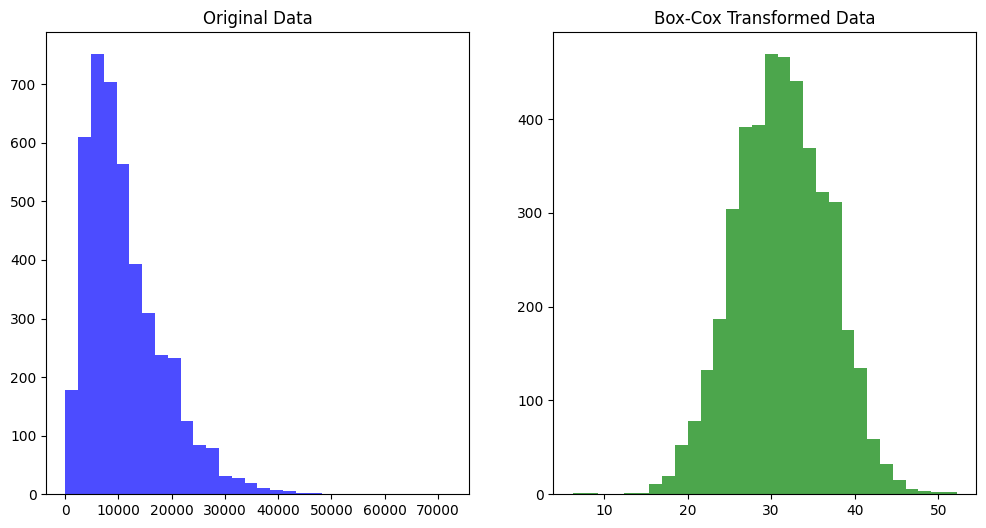

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Plotting
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(1, 2, 1)
plt.hist(Y, bins=30, color='blue', alpha=0.7)
plt.title('Original Data')

# Box-Cox Transformed Data
plt.subplot(1, 2, 2)
plt.hist(Y_boxcox, bins=30, color='green', alpha=0.7)
plt.title('Box-Cox Transformed Data')

plt.show()


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y_boxcox, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Predict on the test set
Y_pred_lin_reg = lin_reg.predict(X_test)

# Calculate metrics
rmse_lin_reg = mean_squared_error(Y_test, Y_pred_lin_reg, squared=False)
r2_lin_reg = r2_score(Y_test, Y_pred_lin_reg)


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, Y_train)

# Predict on the test set
Y_pred_rf = rf_reg.predict(X_test)

# Calculate metrics
rmse_rf = mean_squared_error(Y_test, Y_pred_rf, squared=False)
r2_rf = r2_score(Y_test, Y_pred_rf)


In [18]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting model
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train, Y_train)

# Predict on the test set
Y_pred_gb = gb_reg.predict(X_test)

# Calculate metrics
rmse_gb = mean_squared_error(Y_test, Y_pred_gb, squared=False)
r2_gb = r2_score(Y_test, Y_pred_gb)


In [19]:
print(f"Linear Regression - RMSE: {rmse_lin_reg}, R2: {r2_lin_reg}")
print(f"Random Forest - RMSE: {rmse_rf}, R2: {r2_rf}")
print(f"Gradient Boosting - RMSE: {rmse_gb}, R2: {r2_gb}")


Linear Regression - RMSE: 4.345651156237273, R2: 0.3364792237529163
Random Forest - RMSE: 4.465924169686892, R2: 0.29924292078931247
Gradient Boosting - RMSE: 4.30663577585539, R2: 0.34833995767876824


In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Baseline model: predict the mean of the target variable
mean_train = np.mean(Y_train)
baseline_predictions = np.full(shape=Y_test.shape, fill_value=mean_train)

# Calculate metrics for the baseline model
rmse_baseline = mean_squared_error(Y_test, baseline_predictions, squared=False)
r2_baseline = r2_score(Y_test, baseline_predictions)

print(f"Baseline Model - RMSE: {rmse_baseline}, R2: {r2_baseline}")


Baseline Model - RMSE: 5.3350329919955755, R2: -4.3804300211114366e-05


In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, Y_train)

# Best parameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [22]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5]
}

# Initialize the Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)

# Grid search
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, Y_train)

# Best parameters
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)


Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [23]:
# Retrain models with best parameters
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

best_rf.fit(X_train, Y_train)
best_gb.fit(X_train, Y_train)

# Evaluate on training and test sets
print("Random Forest - Training RMSE:", mean_squared_error(Y_train, best_rf.predict(X_train), squared=False))
print("Random Forest - Test RMSE:", mean_squared_error(Y_test, best_rf.predict(X_test), squared=False))
print("Gradient Boosting - Training RMSE:", mean_squared_error(Y_train, best_gb.predict(X_train), squared=False))
print("Gradient Boosting - Test RMSE:", mean_squared_error(Y_test, best_gb.predict(X_test), squared=False))


Random Forest - Training RMSE: 3.6768823090202445
Random Forest - Test RMSE: 4.398441441120606
Gradient Boosting - Training RMSE: 4.082381079218845
Gradient Boosting - Test RMSE: 4.30663577585539


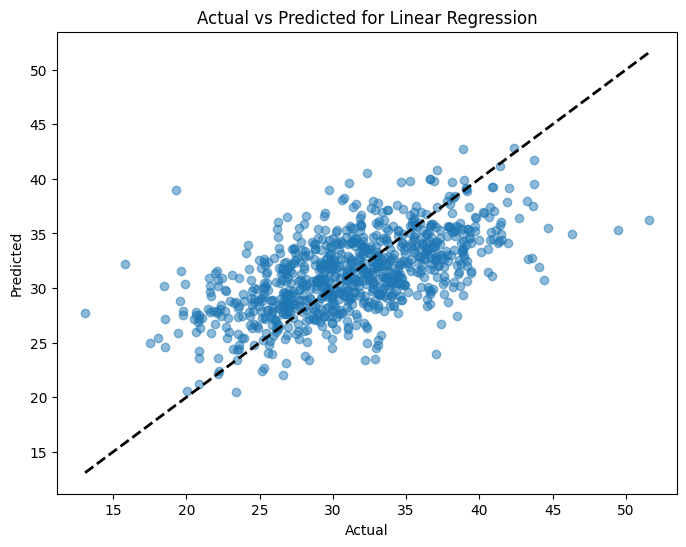

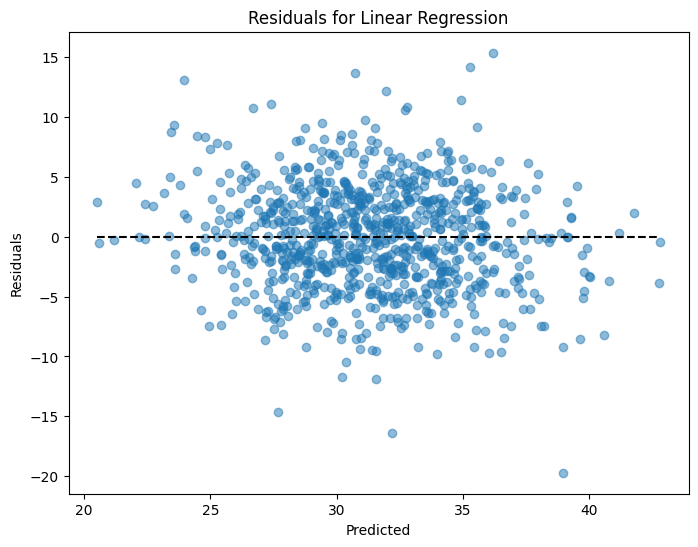

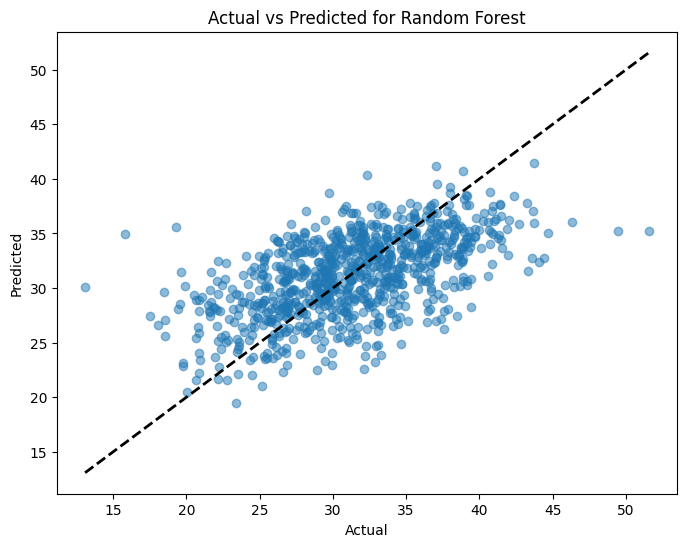

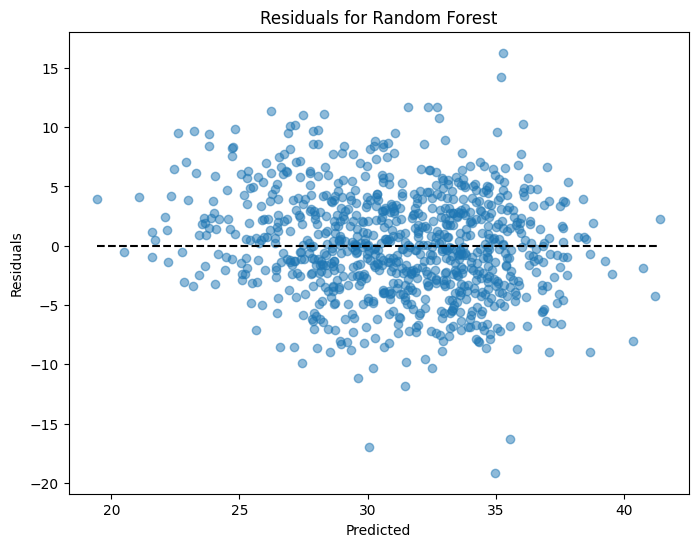

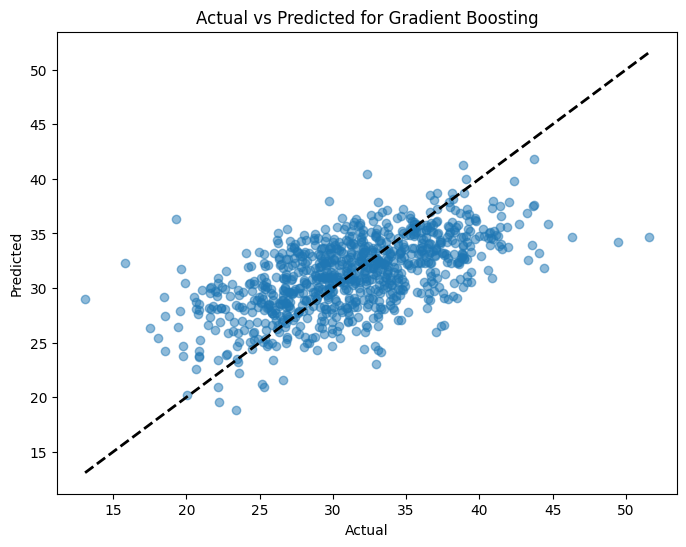

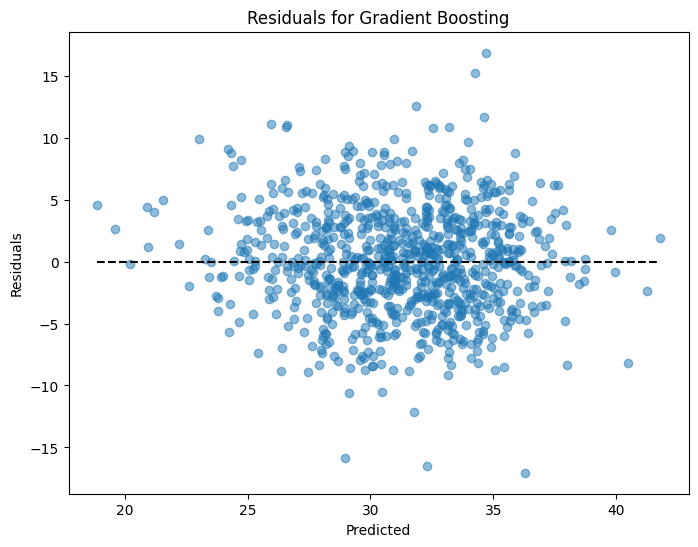

In [24]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_actual_vs_predicted(Y_actual, Y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_actual, Y_pred, alpha=0.5)
    plt.plot([Y_actual.min(), Y_actual.max()], [Y_actual.min(), Y_actual.max()], 'k--', lw=2)  # Diagonal line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

# Function to plot residuals
def plot_residuals(Y_actual, Y_pred, model_name):
    residuals = Y_actual - Y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(Y_pred, residuals, alpha=0.5)
    plt.hlines(y=0, xmin=Y_pred.min(), xmax=Y_pred.max(), colors='k', linestyles='--')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(f'Residuals for {model_name}')
    plt.show()

# Plot for each model
for model_name, Y_pred in zip(['Linear Regression', 'Random Forest', 'Gradient Boosting'],
                              [Y_pred_lin_reg, Y_pred_rf, Y_pred_gb]):
    plot_actual_vs_predicted(Y_test, Y_pred, model_name)
    plot_residuals(Y_test, Y_pred, model_name)
